In [54]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [55]:
# Loading in Olympic data
olympics_data = "cleandata/clean_df.csv"

# Read the cleaned olympic data in cleandata folder

olympics_df = pd.read_csv(olympics_data)
olympics_df


,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,...,Sport,Event,Medal,region,Row,FIPS,GENC,Population,Area (sq km),GDP
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,...,Basketball,Basketball Men's Basketball,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
1,1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,...,Boxing,Boxing Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
2,2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,...,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
3,3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,...,Athletics,Athletics Men's Hammer Throw,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
4,4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,...,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207558,207558,87277,Frans Ntaole,M,33.0,168.0,62.0,Lesotho,LES,1984 Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207559,207559,98490,Gabashane Vincent Rakabaele,M,35.0,163.0,54.0,Lesotho,LES,1984 Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207560,207560,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,...,Boxing,Boxing Men's Welterweight,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207561,207561,81698,Motsapi Moorosi,M,27.0,170.0,62.0,Lesotho,LES,1972 Summer,...,Athletics,Athletics Men's 100 metres,NaN,Lesotho,17388,LT,LS,1116779,30355,8.091583e+07


## Grouped by Country Review

In [56]:
countrypopulation_df = olympics_df[["region","Year","Event","Medal","Population","GDP","Area (sq km)"]]

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)

countrypopulation_df["Medal"]= countrypopulation_df["Medal"].replace(['Gold','Silver','Bronze'], 1, regex=True)

countrypopulation_df= countrypopulation_df.rename(columns = {"region":"Country"})

countrypopulation_df

C:\Users\steve\anaconda3\envs\pythondata\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Country,Year,Event,Medal,Population,GDP,Area (sq km)
0,China,1992,Basketball Men's Basketball,NaN,1182230625,4.270000e+11,9326410
1,China,1992,Boxing Men's Light-Heavyweight,NaN,1182230625,4.270000e+11,9326410
2,China,1992,Rhythmic Gymnastics Women's Individual,NaN,1182230625,4.270000e+11,9326410
3,China,1992,Athletics Men's Hammer Throw,NaN,1182230625,4.270000e+11,9326410
4,China,1992,Weightlifting Men's Light-Heavyweight,NaN,1182230625,4.270000e+11,9326410
...,...,...,...,...,...,...,...
207558,Lesotho,1984,Athletics Men's Marathon,NaN,1519492,3.331585e+08,30355
207559,Lesotho,1984,Athletics Men's Marathon,NaN,1519492,3.331585e+08,30355
207560,Lesotho,1984,Boxing Men's Welterweight,NaN,1519492,3.331585e+08,30355
207561,Lesotho,1972,Athletics Men's 100 metres,NaN,1116779,8.091583e+07,30355


In [57]:
countrypopulation_df = olympics_df[["region","Year","Name","Medal","Population","GDP","Area (sq km)"]]

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)

countrypopulation_df["Medal"]= countrypopulation_df["Medal"].replace(['Gold','Silver','Bronze'], 1, regex=True)

countrypopulation_df= countrypopulation_df.rename(columns = {"region":"Country"})

countrypopulation_group = countrypopulation_df.groupby(["Country","Year"])

athletes = countrypopulation_group["Name"].count()
medals = countrypopulation_group["Medal"].sum()
countrypopulation = countrypopulation_group["Population"].mean()
GDP_country= countrypopulation_group["GDP"].mean()
area_country = countrypopulation_group["Area (sq km)"].max()

    
countrysuccess_df = pd.DataFrame({"Population":countrypopulation,"GDP":GDP_country,"Size (km)":area_country,"Total Athletes":athletes,"Total Medals":medals})
countrysuccess_df

C:\Users\steve\anaconda3\envs\pythondata\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Population           GDP  Size (km)  Total Athletes  \
Country     Year                                                        
Afghanistan 1960   9829450.0  5.377778e+08     652230              16   
            1964  10744167.0  8.000000e+08     652230               8   
            1968  11825320.0  1.373333e+09     652230               5   
            1972  13079460.0  1.595555e+09     652230               8   
            1980  15044289.0  3.641723e+09     652230              11   
...                      ...           ...        ...             ...   
Zimbabwe    2004  12277837.0  5.805598e+09     386847              14   
            2008  12508721.0  4.415703e+09     386847              16   
            2012  12974906.0  1.711485e+10     386847               9   
            2014  13251459.0  1.949552e+10     386847               2   
            2016  13600605.0  2.054868e+10     386847              31   

                  Total Medals  
Country     Year                
Afghanistan 1960           0.0  
            1964           0.0  
            1968           0.0  
            1972           0.0  
            1980           0.0  
...                        ...  
Zimbabwe    2004           3.0  
            2008           4.0  
            2012           0.0  
            2014           0.0  
            2016           0.0  

[2697 rows x 5 columns]

In [58]:
# # olympics_df = olympics_df.fillna("n/a")


# medals = pd.DataFrame({"Medal": olympics_df["Medal"]})
# medals = pd.get_dummies(medals)

countrysuccess_group = countrysuccess_df.groupby(["Country"])

athletes = countrysuccess_group["Total Athletes"].sum()
medals = countrysuccess_group["Total Medals"].sum()
countrypopulation = countrysuccess_group["Population"].mean()
GDP_country= countrysuccess_group["GDP"].mean()
area_country = countrysuccess_group["Size (km)"].max()

success = medals / athletes
    
country_df = pd.DataFrame({"Population":countrypopulation,"GDP":GDP_country,"Size (km)":area_country,"Total Athletes":athletes,"Total Medals":medals})



country_df["Medal Rate"] = success

country_df



,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
Afghanistan,1.917494e+07,5.573067e+09,652230,73,2.0,0.027397
Albania,2.982092e+06,7.784581e+09,27398,70,0.0,0.000000
Algeria,2.690728e+07,8.144863e+10,2381740,551,17.0,0.030853
American Samoa,5.316233e+04,2.644444e+08,198,37,0.0,0.000000
Andorra,6.541841e+04,1.930462e+09,468,169,0.0,0.000000
...,...,...,...,...,...,...
"Virgin Islands, British",2.376980e+04,0.000000e+00,151,45,0.0,0.000000
"Virgin Islands, US",1.010624e+05,1.431750e+09,348,294,1.0,0.003401
Yemen,1.788188e+07,1.433562e+10,527968,48,0.0,0.000000


In [59]:
country_corr = country_df.corr()

country_corr

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Population,1.000000,0.459855,0.476722,0.270316,0.274046,0.313595
GDP,0.459855,1.000000,0.488405,0.689508,0.724130,0.468545
Size (km),0.476722,0.488405,1.000000,0.551636,0.664478,0.491859
Total Athletes,0.270316,0.689508,0.551636,1.000000,0.905429,0.720158
Total Medals,0.274046,0.724130,0.664478,0.905429,1.000000,0.712255
Medal Rate,0.313595,0.468545,0.491859,0.720158,0.712255,1.000000


In [60]:
highest_population = country_df.nlargest(10, 'Population')
highest_population

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
China,1.245402e+09,3.246750e+12,9326410,5040,989.0,0.196230
India,8.968205e+08,6.895029e+11,2973193,1023,88.0,0.086022
USA,2.618698e+08,8.462000e+12,9150541,12497,3658.0,0.292710
Indonesia,1.851647e+08,2.585767e+11,1811569,385,41.0,0.106494
Brazil,1.533327e+08,8.243234e+11,8358140,3341,454.0,0.135887
Russia,1.413216e+08,6.185238e+11,16377742,10468,3607.0,0.344574
Pakistan,1.304236e+08,9.408915e+10,770875,388,107.0,0.275773
Bangladesh,1.265220e+08,7.641742e+10,130170,55,0.0,0.000000
Japan,1.200063e+08,3.306050e+12,364485,7295,809.0,0.110898


In [61]:
lowest_population = country_df.nsmallest(10, 'Population')
lowest_population

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
Nauru,9611.000000,3.283576e+07,21,13,0.0,0.000000
Tuvalu,10647.333333,3.483660e+07,26,7,0.0,0.000000
Palau,20503.600000,2.034462e+08,459,25,0.0,0.000000
"Virgin Islands, British",23769.800000,0.000000e+00,151,45,0.0,0.000000
San Marino,25690.263158,7.803752e+08,61,181,0.0,0.000000
Monaco,28770.900000,3.058650e+09,2,143,0.0,0.000000
Liechtenstein,29677.333333,2.490524e+09,160,323,9.0,0.027864
Cayman Islands,38734.666667,1.875565e+09,264,83,0.0,0.000000
Saint Kitts,48138.333333,6.308931e+08,261,42,0.0,0.000000


In [62]:
highest_gdp = country_df.nlargest(10, 'GDP')
highest_gdp

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
USA,2.618698e+08,8.462000e+12,9150541,12497,3658.0,0.292710
Japan,1.200063e+08,3.306050e+12,364485,7295,809.0,0.110898
China,1.245402e+09,3.246750e+12,9326410,5040,989.0,0.196230
Germany,7.986830e+07,1.942619e+12,348672,12805,3083.0,0.240765
UK,5.863464e+07,1.448792e+12,241930,7397,878.0,0.118697
France,5.902405e+07,1.422059e+12,640427,7580,848.0,0.111873
Italy,5.730724e+07,1.151833e+12,294140,7754,1004.0,0.129482
Brazil,1.533327e+08,8.243234e+11,8358140,3341,454.0,0.135887
Canada,2.870657e+07,7.736509e+11,9093507,8021,974.0,0.121431


In [63]:
lowest_gdp = country_df.nsmallest(10, 'GDP')
lowest_gdp

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
Curacao,1.407553e+05,0.000000e+00,444,68,1.0,0.014706
North Korea,2.081055e+07,0.000000e+00,120408,807,67.0,0.083024
South Sudan,1.097710e+07,0.000000e+00,644329,3,0.0,0.000000
"Virgin Islands, British",2.376980e+04,0.000000e+00,151,45,0.0,0.000000
Nauru,9.611000e+03,3.283576e+07,21,13,0.0,0.000000
Tuvalu,1.064733e+04,3.483660e+07,26,7,0.0,0.000000
Sao Tome and Principe,1.621450e+05,1.497967e+08,964,15,0.0,0.000000
Kiribati,9.938850e+04,1.529955e+08,811,11,0.0,0.000000
Marshall Islands,6.822367e+04,1.779487e+08,181,14,0.0,0.000000


In [64]:
largest_countries = country_df.nlargest(10, 'Size (km)')
largest_countries

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
Russia,1.413216e+08,6.185238e+11,16377742,10468,3607.0,0.344574
China,1.245402e+09,3.246750e+12,9326410,5040,989.0,0.196230
USA,2.618698e+08,8.462000e+12,9150541,12497,3658.0,0.292710
Canada,2.870657e+07,7.736509e+11,9093507,8021,974.0,0.121431
Brazil,1.533327e+08,8.243234e+11,8358140,3341,454.0,0.135887
Australia,1.756673e+07,5.169036e+11,7682300,6739,1173.0,0.174061
India,8.968205e+08,6.895029e+11,2973193,1023,88.0,0.086022
Argentina,3.400359e+07,2.225106e+11,2736690,2408,204.0,0.084718
Kazakhstan,1.666981e+07,8.987546e+10,2699700,1429,77.0,0.053884


In [65]:
smallest_countries = country_df.nsmallest(10, 'Size (km)')
smallest_countries

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
Monaco,28770.900000,3.058650e+09,2,143,0.0,0.000000
Nauru,9611.000000,3.283576e+07,21,13,0.0,0.000000
Tuvalu,10647.333333,3.483660e+07,26,7,0.0,0.000000
Bermuda,60517.350000,3.204525e+09,54,160,1.0,0.006250
San Marino,25690.263158,7.803752e+08,61,181,0.0,0.000000
"Virgin Islands, British",23769.800000,0.000000e+00,151,45,0.0,0.000000
Liechtenstein,29677.333333,2.490524e+09,160,323,9.0,0.027864
Aruba,90025.000000,1.912540e+09,180,42,0.0,0.000000
Marshall Islands,68223.666667,1.779487e+08,181,14,0.0,0.000000


In [66]:
top_medals = country_df.nlargest(10, 'Total Medals')
top_medals

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
USA,2.618698e+08,8.462000e+12,9150541,12497,3658.0,0.292710
Russia,1.413216e+08,6.185238e+11,16377742,10468,3607.0,0.344574
Germany,7.986830e+07,1.942619e+12,348672,12805,3083.0,0.240765
Australia,1.756673e+07,5.169036e+11,7682300,6739,1173.0,0.174061
Italy,5.730724e+07,1.151833e+12,294140,7754,1004.0,0.129482
China,1.245402e+09,3.246750e+12,9326410,5040,989.0,0.196230
Canada,2.870657e+07,7.736509e+11,9093507,8021,974.0,0.121431
UK,5.863464e+07,1.448792e+12,241930,7397,878.0,0.118697
France,5.902405e+07,1.422059e+12,640427,7580,848.0,0.111873


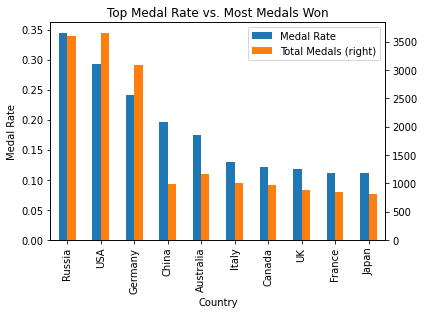

In [67]:
medals_chart = top_medals[["Medal Rate", "Total Medals"]]
medals_chart = medals_chart.sort_values("Medal Rate", ascending=False)
mostmedals_bar = medals_chart.plot(kind="bar", secondary_y = "Total Medals", title=("Top Medal Rate vs. Most Medals Won"),)
mostmedals_bar.set_ylabel("Medal Rate")
plt.show()



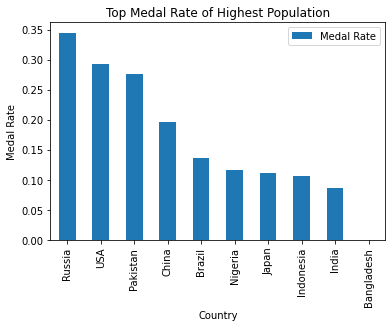

In [68]:
highest_population = highest_population.sort_values("Medal Rate", ascending= False)
highestpopulation_bar = highest_population.plot(kind="bar", y='Medal Rate', title=("Top Medal Rate of Highest Population"))
highestpopulation_bar.set_ylabel("Medal Rate")
plt.show()

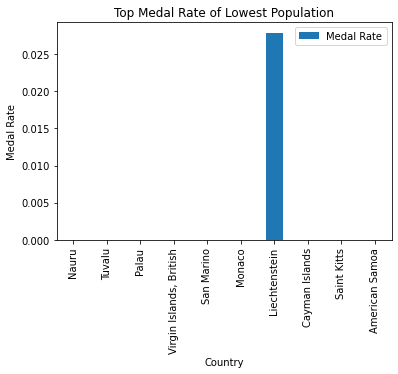

In [69]:
lowestpopulation_bar = lowest_population.plot(kind="bar", y='Medal Rate', title=("Top Medal Rate of Lowest Population"))
lowestpopulation_bar.set_ylabel("Medal Rate")
plt.show()

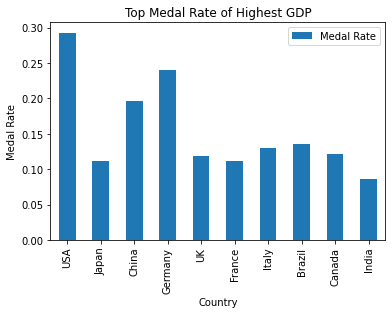

In [70]:
highestgdp_bar = highest_gdp.plot(kind="bar", y='Medal Rate', title=("Top Medal Rate of Highest GDP"))
highestgdp_bar.set_ylabel("Medal Rate")
plt.show()

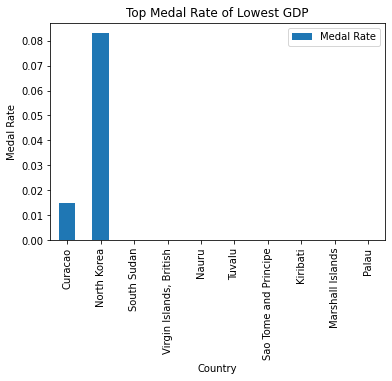

In [71]:
lowestgdp_bar = lowest_gdp.plot(kind="bar", y='Medal Rate', title=("Top Medal Rate of Lowest GDP"))
lowestgdp_bar.set_ylabel("Medal Rate")
plt.show()

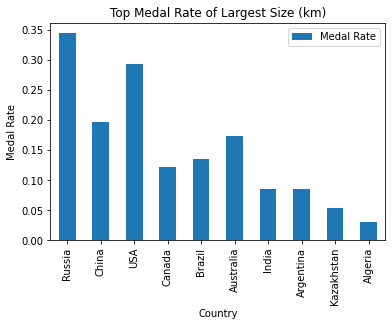

In [72]:
largestcountry_bar = largest_countries.plot(kind="bar", y='Medal Rate', title=("Top Medal Rate of Largest Size (km)"))
largestcountry_bar.set_ylabel("Medal Rate")
plt.show()

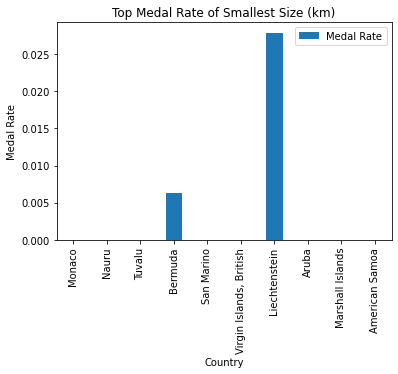

In [73]:
smallestcountry_bar = smallest_countries.plot(kind="bar", y='Medal Rate', title=("Top Medal Rate of Smallest Size (km)"))
smallestcountry_bar.set_ylabel("Medal Rate")
plt.show()